In [1]:
#-----------------------------------Grades of Students dataset-------------------------------------------------
#import the required libraries
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
80,CS-97081,D+,B-,C-,D,D,B+,A-,B-,B,...,C+,C+,C+,B-,A,A,B+,B,A-,2.815
163,CS-97164,A,B-,B+,A,B,A,A,B-,B,...,C,B+,B,C+,A-,A-,B,C,A-,3.227
190,CS-97191,C,B,C-,C,C-,A-,D+,D,C-,...,B,D,C,D+,A-,B+,C-,C-,B-,2.042
58,CS-97059,B+,B,C+,A-,A-,A-,C-,B,A-,...,B-,A-,B-,C-,A-,A,B-,B,A-,3.168
550,CS-97551,B-,B,A,C,A,A-,D+,A-,D,...,A,C,B+,B-,C,D+,C,F,F,2.359
538,CS-97539,A-,C,A,A-,A,B+,A-,B-,A,...,A,A-,A,B,A,B,A-,A-,A-,3.499
32,CS-97033,B,C+,A,D+,A-,A,A-,A,A-,...,C+,B,B,C-,A,A-,B+,B-,B+,3.220
435,CS-97436,A,B-,A,A,B,A,A-,B,A-,...,A,B,A-,B+,A-,B+,A,A,A-,3.559
31,CS-97032,A,C+,A-,C+,B+,A-,B-,B+,A-,...,C,C+,C+,C+,A,A,B,B+,A-,3.133
143,CS-97144,D,D,WU,WU,WU,D,WU,WU,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000


In [5]:
df.shape

(571, 43)

Here the size of dataset is (571,43) with 42 features and 1 target(CGPA) which is continous in nature , where as the features column is categorical in nature with less cardinality

In [6]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [6]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [7]:
pd.set_option('display.max_rows',44)

In [8]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

From the above observation , we can see that all the datatypes match with the columns

In [19]:
#Checking for null values in dataframe
df.isnull().sum()


Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
df['CGPA'].nunique() # the target column has 491 varients 

491

In [11]:
#To check whether whitespaces are present in target column
df.loc[df['CGPA']==' ']

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


#Handling null/nan values------ > as null/nan values are present in most of the columns
1)Null/nan values are very very high is columns--- >CS-406, CS-412 [ we shall drop these columns]
2)Since all the columns with null values are categorical in nature, we shall use 'mode' to fill the values


In [12]:
df['CY-105'].value_counts()

A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

In [13]:
mode1 = df['CY-105'].mode()
mode1

0    A
Name: CY-105, dtype: object

In [22]:
missing_cat=[var for var in df.columns if df[var].isnull().mean()>0 
             and df[var].dtypes=='O']

In [23]:
missing_cat

['CY-105',
 'HS-105/12',
 'MT-111',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

The above is the list of null values in the columns

#Since our features of missing null values is categorical in nature, we shall use mode to fill the null values

In [24]:
df['CY-105'].isnull().mean()

0.0017513134851138354

In [25]:
df['CY-105'].isnull().sum()

1

In [26]:
df['CY-105'].mode()

0    A
Name: CY-105, dtype: object

In [27]:
df['CY-105'].fillna('A',inplace=True)

In [28]:
df['CY-105'].isnull().sum()

0

In [31]:
df['HS-105/12'].isnull().sum()
df['HS-105/12'].mode()

0    A
Name: HS-105/12, dtype: object

In [32]:
df['HS-105/12'].fillna('A',inplace=True)

In [33]:
df['HS-105/12'].isnull().sum()

0

In [34]:
df['MT-111'].isnull().sum()


2

In [35]:
df['MT-111'].mode()

0    A-
Name: MT-111, dtype: object

In [37]:
df['MT-111'].fillna('A-',inplace=True)

In [38]:
df['MT-111'].isnull().sum()

0

In [39]:
df['CS-106'].isnull().sum()

2

In [40]:
df['CS-106'].mode()

0    A-
Name: CS-106, dtype: object

In [41]:
df['CS-106'].fillna('A-',inplace=True)

In [42]:
df['CS-106'].isnull().sum()

0

In [43]:
df['EL-102'].isnull().sum()

2

In [44]:
df['EL-102'].mode()

0    A-
Name: EL-102, dtype: object

In [45]:
df['EL-102'].fillna('A-',inplace=True)

In [46]:
df['EL-102'].isnull().sum()

0

In [48]:
df['EE-119'].isnull().sum()

2

In [49]:
df['EE-119'].mode()

0    A-
Name: EE-119, dtype: object

In [52]:
df['EE-119'].fillna('A-',inplace=True)

In [53]:
df['EE-119'].isnull().sum()

0

In [54]:
df['ME-107'].isnull().sum()

2

In [55]:
df['ME-107'].mode()

0    A-
Name: ME-107, dtype: object

In [56]:
df['ME-107'].fillna('A-',inplace=True)

In [57]:
df['ME-107'].isnull().sum()

0

In [58]:
df['CS-107'].isnull().sum()

2

In [59]:
df['CS-107'].mode()

0    A
Name: CS-107, dtype: object

In [60]:
df['CS-107'].fillna('A',inplace=True)

In [61]:
df['CS-107'].isnull().sum()

0

In [62]:
df['HS-205/20'].isnull().sum()

5

In [63]:
df['HS-205/20'].mode()

0    A-
Name: HS-205/20, dtype: object

In [64]:
df['HS-205/20'].fillna('A-',inplace=True)

In [65]:
df['HS-205/20'].isnull().sum()

0

In [66]:
df['MT-222'].isnull().sum()

5

In [67]:
df['MT-222'].mode()

0    A-
Name: MT-222, dtype: object

In [68]:
df['MT-222'].fillna('A-',inplace=True)

In [69]:
df['MT-222'].isnull().sum()

0

In [71]:
df['EE-222'].isnull().sum()

7

In [73]:
df['EE-222'].mode()

0    A
Name: EE-222, dtype: object

In [74]:
df['EE-222'].fillna('A',inplace=True)

In [75]:
df['EE-222'].isnull().sum()

0

In [76]:
df['MT-224'].isnull().sum()

7

In [77]:
df['MT-224'].mode()

0    A-
Name: MT-224, dtype: object

In [78]:
df['MT-224'].fillna('A-',inplace=True)

In [79]:
df['MT-224'].isnull().sum()

0

In [80]:
df['CS-210'].isnull().sum()

7

In [81]:
df['CS-210'].mode()

0    A-
Name: CS-210, dtype: object

In [82]:
df['CS-210'].fillna('A-',inplace=True)

In [83]:
df['CS-210'].isnull().sum()

0

In [85]:
df['CS-211'].isnull().sum()

5

In [86]:
df['CS-211'].mode()

0    A-
Name: CS-211, dtype: object

In [87]:
df['CS-211'].fillna('A-',inplace=True)

In [88]:
df['CS-211'].isnull().sum()

0

In [89]:
df['CS-203'].isnull().sum()

5

In [90]:
df['CS-203'].mode()

0    A-
Name: CS-203, dtype: object

In [91]:
df['CS-203'].fillna('A-',inplace=True)

In [92]:
df['CS-203'].isnull().sum()

0

In [93]:
df['CS-214'].isnull().sum()

6

In [94]:
df['CS-214'].mode()

0    C
Name: CS-214, dtype: object

In [95]:
df['CS-214'].fillna('C',inplace=True)

In [96]:
df['CS-214'].isnull().sum()

0

In [97]:
df['EE-217'].isnull().sum()

6

In [98]:
df['EE-217'].mode()

0    A-
Name: EE-217, dtype: object

In [99]:
df['EE-217'].fillna('A-',inplace=True)

In [100]:
df['EE-217'].isnull().sum()

0

In [101]:
df['CS-212'].isnull().sum()

6

In [102]:
df['CS-212'].mode()

0    A-
Name: CS-212, dtype: object

In [103]:
df['CS-212'].fillna('A-',inplace=True)

In [104]:
df['CS-212'].isnull().sum()

0

In [105]:
df['CS-215'].isnull().sum()

6

In [106]:
df['CS-215'].mode()

0    A-
Name: CS-215, dtype: object

In [107]:
df['CS-215'].fillna('A-',inplace=True)

In [108]:
df['CS-215'].isnull().sum()

0

In [109]:
df['MT-331'].isnull().sum()

9

In [110]:
df['MT-331'].mode()

0    A
Name: MT-331, dtype: object

In [111]:
df['MT-331'].fillna('A',inplace=True)

In [112]:
df['MT-331'].isnull().sum()

0

In [120]:
df['EF-303'].isnull().sum()

0

In [121]:
df['EF-303'].mode()

0    B
Name: EF-303, dtype: object

In [122]:
df['EF-303'].fillna('B',inplace=True)

In [123]:
df['EF-303'].isnull().sum()

0

In [124]:
df['HS-304'].isnull().sum()

10

In [125]:
df['HS-304'].mode()

0    A-
Name: HS-304, dtype: object

In [126]:
df['HS-304'].fillna('A-',inplace=True)

In [127]:
df['HS-304'].isnull().sum()

0

In [128]:
df['CS-301'].isnull().sum()

10

In [129]:
df['CS-301'].mode()

0    A-
Name: CS-301, dtype: object

In [130]:
df['CS-301'].fillna('A-',inplace=True)

In [131]:
df['CS-301'].isnull().sum()

0

In [132]:
df['CS-302'].isnull().sum()

10

In [133]:
df['CS-302'].mode()

0    A-
Name: CS-302, dtype: object

In [134]:
df['CS-302'].fillna('A-',inplace=True)

In [135]:
df['CS-302'].isnull().sum()

0

In [136]:
df['TC-383'].isnull().sum()

10

In [137]:
df['TC-383'].mode()

0    A
Name: TC-383, dtype: object

In [138]:
df['TC-383'].fillna('A',inplace=True)

In [139]:
df['TC-383'].isnull().sum()

0

In [140]:
df['MT-442'].isnull().sum()

10

In [141]:
df['MT-442'].mode()

0    A-
Name: MT-442, dtype: object

In [142]:
df['MT-442'].fillna('A-',inplace=True)

In [143]:
df['MT-442'].isnull().sum()

0

In [144]:
df['EL-332'].isnull().sum()

9

In [145]:
df['EL-332'].mode()

0    A-
Name: EL-332, dtype: object

In [146]:
df['EL-332'].fillna('A-',inplace=True)

In [147]:
df['EL-332'].isnull().sum()

0

In [148]:
df['CS-318'].isnull().sum()

9

In [149]:
df['CS-318'].mode()

0    A-
Name: CS-318, dtype: object

In [150]:
df['CS-318'].fillna('A-',inplace=True)

In [151]:
df['CS-318'].isnull().sum()

0

In [152]:
df['CS-306'].isnull().sum()

9

In [153]:
df['CS-306'].mode()

0    A-
Name: CS-306, dtype: object

In [154]:
df['CS-306'].fillna('A-',inplace=True)

In [155]:
df['CS-306'].isnull().sum()

0

In [156]:
df['CS-312'].isnull().sum()

10

In [157]:
df['CS-312'].mode()

0    A+
Name: CS-312, dtype: object

In [158]:
df['CS-312'].fillna('A+',inplace=True)

In [159]:
df['CS-312'].isnull().sum()

0

In [160]:
df['CS-317'].isnull().sum()

12

In [167]:
df['CS-317'].mode()

0    B-
Name: CS-317, dtype: object

In [168]:
df['CS-317'].fillna('B-',inplace=True)

In [169]:
df['CS-317'].isnull().sum()

0

In [170]:
df['CS-403'].isnull().sum()

12

In [171]:
df['CS-403'].mode()

0    A
Name: CS-403, dtype: object

In [172]:
df['CS-403'].fillna('A',inplace=True)

In [173]:
df['CS-403'].isnull().sum()

0

In [174]:
df['CS-421'].isnull().sum()

12

In [175]:
df['CS-421'].mode()

0    B
Name: CS-421, dtype: object

In [176]:
df['CS-421'].fillna('B',inplace=True)

In [177]:
df['CS-421'].isnull().sum()

0

In [178]:
df['CS-414'].isnull().sum()

13

In [179]:
df['CS-414'].mode()

0    A
Name: CS-414, dtype: object

In [180]:
df['CS-414'].fillna('A',inplace=True)

In [181]:
df['CS-414'].isnull().sum()

0

In [182]:
df['CS-419'].isnull().sum()

13

In [183]:
df['CS-419'].mode()

0    A-
Name: CS-419, dtype: object

In [184]:
df['CS-419'].fillna('A-',inplace=True)

In [185]:
df['CS-419'].isnull().sum()

0

In [186]:
df['CS-423'].isnull().sum()

14

In [187]:
df['CS-423'].mode()

0    A-
Name: CS-423, dtype: object

In [188]:
df['CS-423'].fillna('A-',inplace=True)

In [189]:
df['CS-423'].isnull().sum()

0

For the below 2 columns , we shall drop those columns since the missing nan values is very large (>50%)
CS-406 and CS-412

In [190]:
df['CS-406'].isnull().sum()

85

In [191]:
df['CS-412'].isnull().sum()

79

In [192]:
#Check for all filled (null values) with mode of the column's
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        0
HS-105/12     0
MT-111        0
CS-105        0
CS-106        0
EL-102        0
EE-119        0
ME-107        0
CS-107        0
HS-205/20     0
MT-222        0
EE-222        0
MT-224        0
CS-210        0
CS-211        0
CS-203        0
CS-214        0
EE-217        0
CS-212        0
CS-215        0
MT-331        0
EF-303        0
HS-304        0
CS-301        0
CS-302        0
TC-383        0
MT-442        0
EL-332        0
CS-318        0
CS-306        0
CS-312        0
CS-317        0
CS-403        0
CS-421        0
CS-406       85
CS-414        0
CS-419        0
CS-423        0
CS-412       79
CGPA          0
dtype: int64

In [193]:
df=df.drop(['CS-406','CS-412'],axis=1)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C,C-,C-,C-,C-,A,C-,B,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,A-,D,D+,D,C,D,B-,C,C,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,A-,B,B,A,C,A,A,A-,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,B+,C-,D+,C,D+,C-,B,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,A-,B-,B+,B+,B-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,B+,A-,A-,A,A,B+,B+,B,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A+,A-,B+,B+,A,A,B,A-,C,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,C+,B+,A-,B,A,B+,C,B+,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,B-,B+,D,B,B,C-,C,B,B-,2.193


In [194]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

In [196]:
#After drop of 2 columns , our new df has 41 columns
df.shape 

(571, 41)

In [197]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
375,CS-97376,D,C,B,B-,B-,B-,B+,A,D+,...,B-,D,A-,D+,C,C,B,C-,A-,2.478
467,CS-97468,C+,B-,A,B,A,B+,B-,D,C,...,F,D+,B+,C-,B+,D+,B+,C,D+,2.264
252,CS-97253,B+,B+,B,B,B,A-,B,A-,B,...,B+,B-,C+,C+,B+,C-,A-,B,B-,3.043
157,CS-97158,A-,B-,A-,A,B-,A,B,B+,B,...,B+,B+,C-,B-,C+,C+,A-,B-,C,3.182
234,CS-97235,A+,A,A,A+,A,A+,A-,A-,A-,...,A-,A,A-,A,A,B+,A,A,A+,3.754
10,CS-97011,A-,B-,B+,C-,C-,B-,C+,B-,A,...,A-,B+,C,B-,C-,C-,B+,B-,C-,2.681
374,CS-97375,C,B+,A,B+,A,B,B+,B+,B-,...,B-,A,A+,A-,A,B,A,B,A,3.491
253,CS-97254,B-,A,B+,A,A-,A,C+,B-,C+,...,B+,B-,C-,C+,C+,D+,B+,C+,D+,2.440
277,CS-97278,B+,D+,D+,B,D+,A,A-,B,C+,...,C+,B,C,B-,B,C+,A-,C-,C,2.705
232,CS-97233,A-,A,A-,A-,A-,A+,A-,A-,A-,...,A-,A-,A-,A-,B+,B+,A,A,A-,3.727


# Data Visualization

In [202]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-414', 'CS-419', 'CS-423', 'CGPA'],
      dtype='object')

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


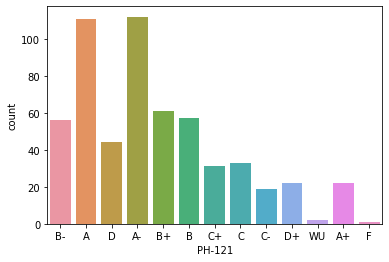

In [198]:
sns.countplot(x='PH-121',data=df)
print(df['PH-121'].value_counts())

A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


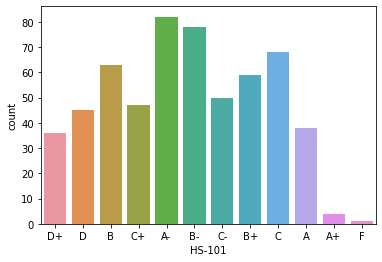

In [203]:
sns.countplot(x='HS-101',data=df)
print(df['HS-101'].value_counts())

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


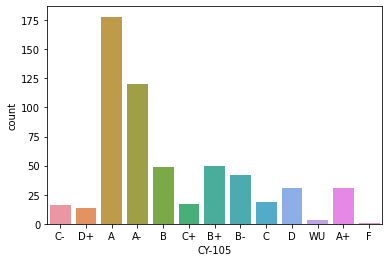

In [204]:
sns.countplot(x='CY-105',data=df)
print(df['CY-105'].value_counts())

A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


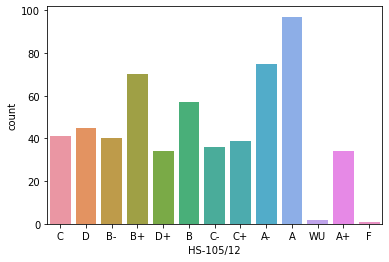

In [205]:
sns.countplot(x='HS-105/12',data=df)
print(df['HS-105/12'].value_counts())

A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


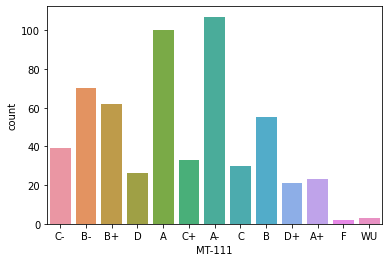

In [206]:
sns.countplot(x='MT-111',data=df)
print(df['MT-111'].value_counts())

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


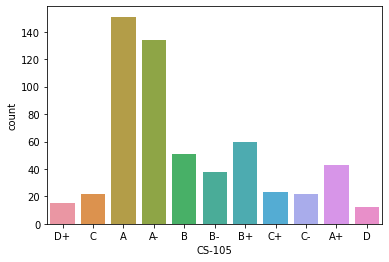

In [207]:
sns.countplot(x='CS-105',data=df)
print(df['CS-105'].value_counts())

A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: CS-106, dtype: int64


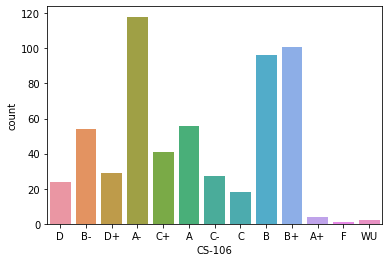

In [208]:
sns.countplot(x='CS-106',data=df)
print(df['CS-106'].value_counts())

A-    107
A      92
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


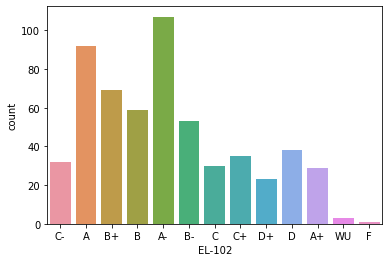

In [209]:
sns.countplot(x='EL-102',data=df)
print(df['EL-102'].value_counts())

A-    139
B+     83
B      77
A      68
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
WU      1
Name: EE-119, dtype: int64


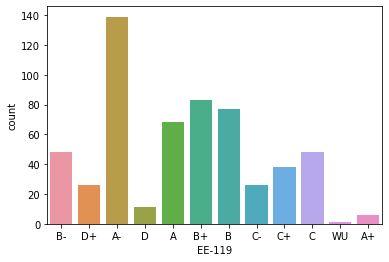

In [210]:
sns.countplot(x='EE-119',data=df)
print(df['EE-119'].value_counts())

A-    81
A     77
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
F      2
Name: ME-107, dtype: int64


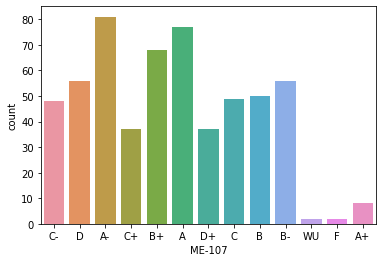

In [211]:
sns.countplot(x='ME-107',data=df)
print(df['ME-107'].value_counts())

A     107
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
WU      2
I       1
F       1
Name: CS-107, dtype: int64


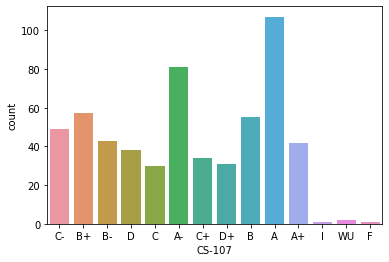

In [212]:
sns.countplot(x='CS-107',data=df)
print(df['CS-107'].value_counts())

A-    155
A     118
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


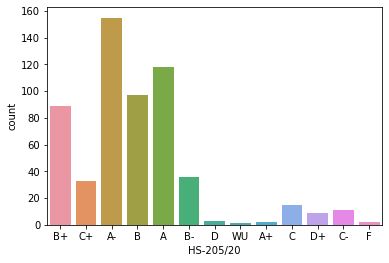

In [213]:
sns.countplot(x='HS-205/20',data=df)
print(df['HS-205/20'].value_counts())

A-    91
A     80
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT-222, dtype: int64


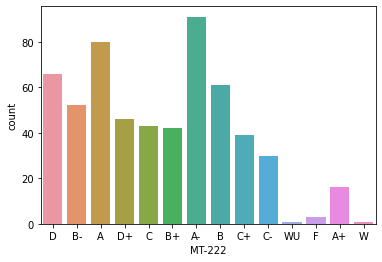

In [214]:
sns.countplot(x='MT-222',data=df)
print(df['MT-222'].value_counts())

A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


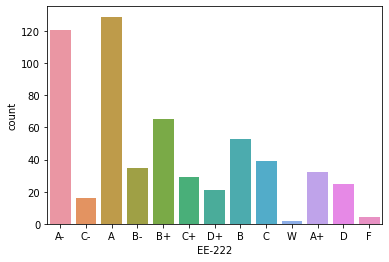

In [215]:
sns.countplot(x='EE-222',data=df)
print(df['EE-222'].value_counts())

A-    127
A      80
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


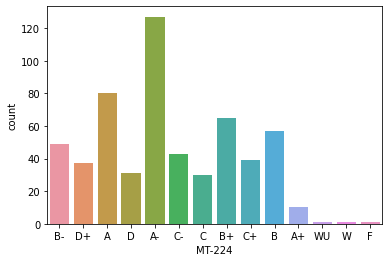

In [216]:
sns.countplot(x='MT-224',data=df)
print(df['MT-224'].value_counts())

A-    140
A     101
B+     84
B      59
B-     58
C      30
C+     27
C-     24
D+     21
D      12
A+     12
WU      1
W       1
F       1
Name: CS-210, dtype: int64


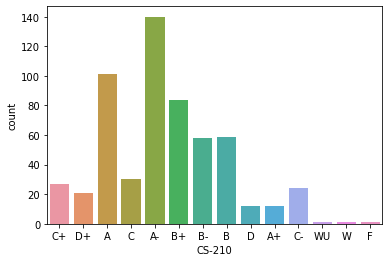

In [217]:
sns.countplot(x='CS-210',data=df)
print(df['CS-210'].value_counts())

A-    73
A     67
B-    60
D+    56
B+    56
B     56
C+    55
C-    50
C     39
D     33
A+    21
F      3
WU     1
W      1
Name: CS-211, dtype: int64


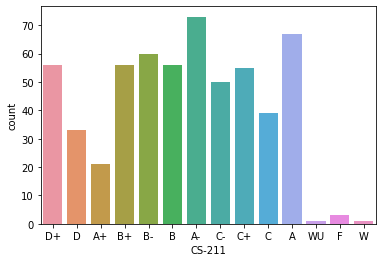

In [218]:
sns.countplot(x='CS-211',data=df)
print(df['CS-211'].value_counts())

A-    93
A     81
B     66
C+    62
B+    59
B-    53
D+    39
C     35
C-    35
D     30
A+    15
F      2
I      1
Name: CS-203, dtype: int64


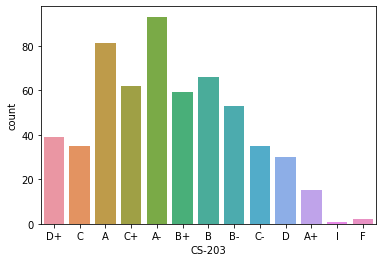

In [219]:
sns.countplot(x='CS-203',data=df)
print(df['CS-203'].value_counts())

C     82
A-    73
B     63
C-    57
B-    56
A     56
D+    47
C+    46
B+    45
D     31
A+    12
F      2
I      1
Name: CS-214, dtype: int64


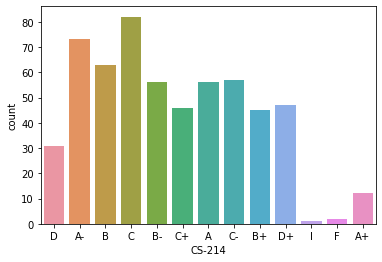

In [220]:
sns.countplot(x='CS-214',data=df)
print(df['CS-214'].value_counts())

A-    143
A      97
B+     70
B      63
B-     57
C      36
C+     29
A+     22
C-     20
D+     19
D      12
F       2
WU      1
Name: EE-217, dtype: int64


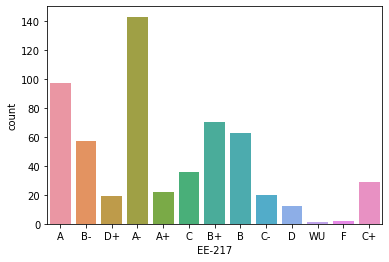

In [221]:
sns.countplot(x='EE-217',data=df)
print(df['EE-217'].value_counts())

A-    107
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


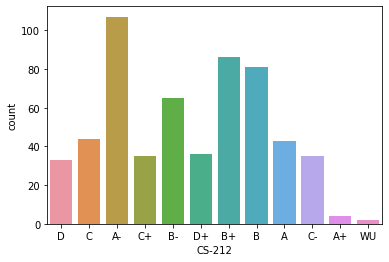

In [222]:
sns.countplot(x='CS-212',data=df)
print(df['CS-212'].value_counts())

A-    85
A     68
B     64
B-    59
C+    50
B+    50
C     48
C-    47
D     42
D+    38
A+    17
WU     1
W      1
F      1
Name: CS-215, dtype: int64


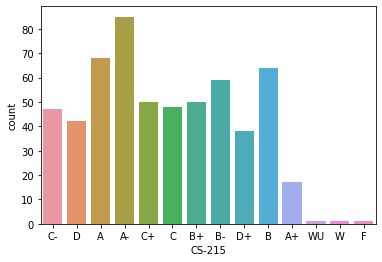

In [223]:
sns.countplot(x='CS-215',data=df)
print(df['CS-215'].value_counts())

A     127
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


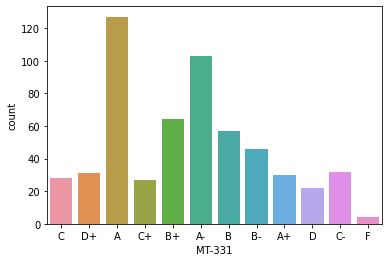

In [224]:
sns.countplot(x='MT-331',data=df)
print(df['MT-331'].value_counts())

B     122
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64


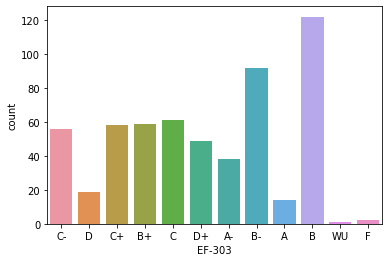

In [225]:
sns.countplot(x='EF-303',data=df)
print(df['EF-303'].value_counts())

A-    138
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


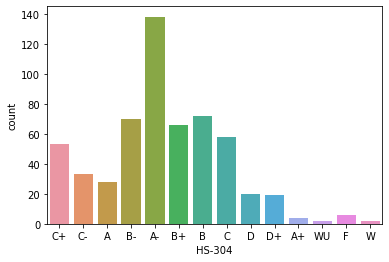

In [226]:
sns.countplot(x='HS-304',data=df)
print(df['HS-304'].value_counts())

A-    118
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64


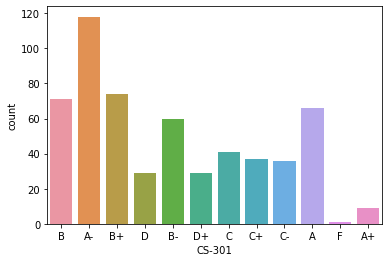

In [227]:
sns.countplot(x='CS-301',data=df)
print(df['CS-301'].value_counts())

A-    123
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


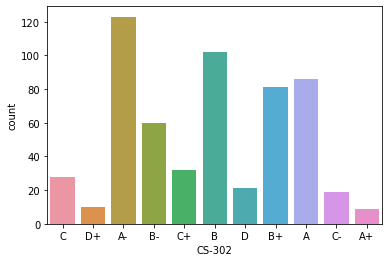

In [228]:
sns.countplot(x='CS-302',data=df)
print(df['CS-302'].value_counts())

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


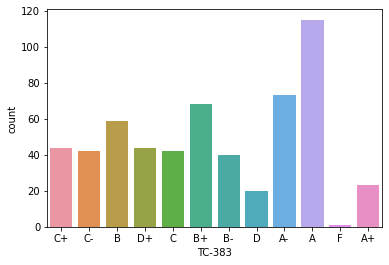

In [229]:
sns.countplot(x='TC-383',data=df)
print(df['TC-383'].value_counts())

A-    150
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64


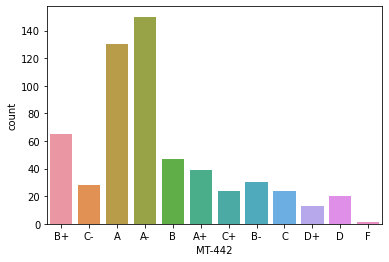

In [230]:
sns.countplot(x='MT-442',data=df)
print(df['MT-442'].value_counts())

A-    105
A      76
B+     68
B      67
B-     62
C      49
C+     38
C-     32
D+     22
D      22
A+     20
F       9
WU      1
Name: EL-332, dtype: int64


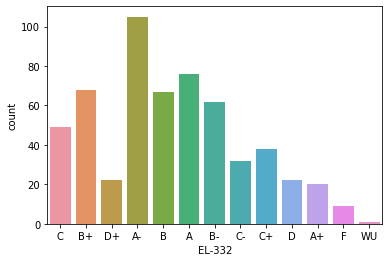

In [231]:
sns.countplot(x='EL-332',data=df)
print(df['EL-332'].value_counts())

A-    98
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64


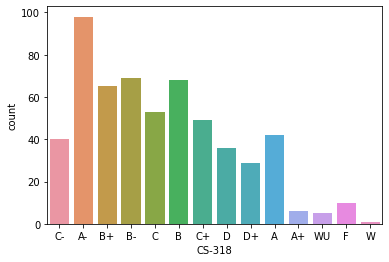

In [232]:
sns.countplot(x='CS-318',data=df)
print(df['CS-318'].value_counts())

A-    129
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64


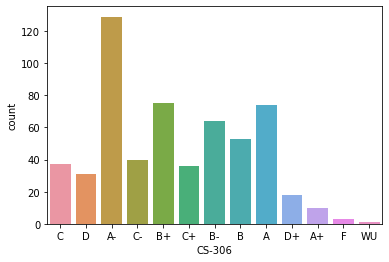

In [233]:
sns.countplot(x='CS-306',data=df)
print(df['CS-306'].value_counts())

A+    103
A      86
A-     63
D+     52
C      48
C-     44
B+     42
B      37
C+     37
B-     36
D      19
F       2
W       1
WU      1
Name: CS-312, dtype: int64


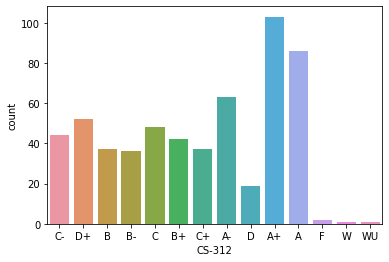

In [234]:
sns.countplot(x='CS-312',data=df)
print(df['CS-312'].value_counts())

B-    91
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64


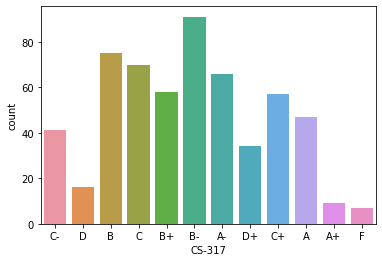

In [235]:
sns.countplot(x='CS-317',data=df)
print(df['CS-317'].value_counts())

A     145
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


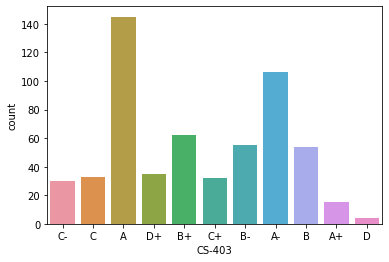

In [236]:
sns.countplot(x='CS-403',data=df)
print(df['CS-403'].value_counts())

B     98
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64


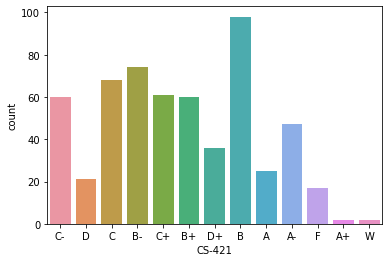

In [237]:
sns.countplot(x='CS-421',data=df)
print(df['CS-421'].value_counts())

A     189
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64


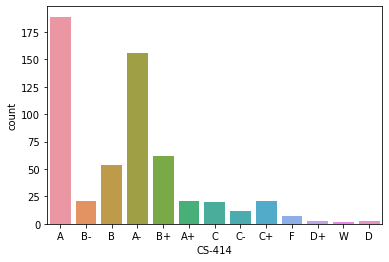

In [238]:
sns.countplot(x='CS-414',data=df)
print(df['CS-414'].value_counts())

A-    133
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


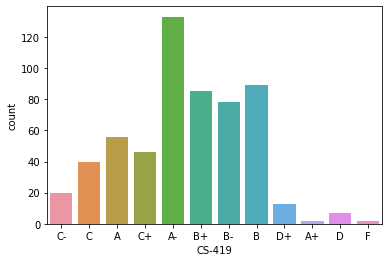

In [239]:
sns.countplot(x='CS-419',data=df)
print(df['CS-419'].value_counts())

A-    136
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64


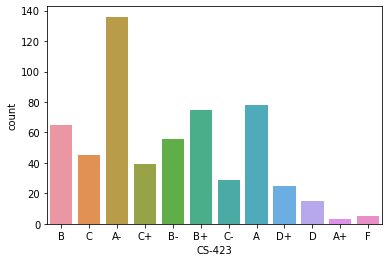

In [240]:
sns.countplot(x='CS-423',data=df)
print(df['CS-423'].value_counts())

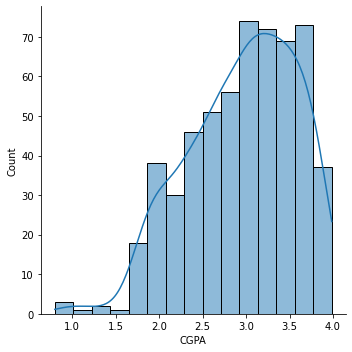

In [199]:
#Checking the distribution of target variable
sns.displot(df['CGPA'],kde=True)

In [ ]:
From the above observation we can see that maximum CGPA lies in the range 2.0 to 4.0

# Encoding of dataframe

Since our dataset has a lot of string values , we need to encode to convert Object data to numeric data

In [242]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [243]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,6.0,8.0,8.0,8.0,8.0,0.0,8.0,3.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,2.0,9.0,10.0,9.0,6.0,9.0,5.0,6.0,6.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,2.0,2.0,3.0,3.0,0.0,6.0,0.0,0.0,2.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,4.0,8.0,10.0,6.0,10.0,8.0,3.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,2.0,5.0,4.0,4.0,5.0,0.0,2.0,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,0.0,4.0,2.0,2.0,0.0,0.0,4.0,4.0,3.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,2.0,4.0,4.0,0.0,0.0,3.0,2.0,6.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,2.0,3.0,0.0,4.0,6.0,4.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,5.0,4.0,9.0,3.0,3.0,8.0,6.0,3.0,5.0,2.193


In [245]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat No.,571.0,285.000000,164.977776,0.0,142.500,285.000,427.500,570.000
PH-121,571.0,3.781086,3.046895,0.0,2.000,3.000,6.000,12.000
HS-101,571.0,5.071804,2.785317,0.0,3.000,5.000,7.000,11.000
CY-105,571.0,2.898424,2.964737,0.0,0.000,2.000,4.500,12.000
HS-105/12,571.0,4.241681,3.200507,0.0,2.000,4.000,7.000,12.000
MT-111,571.0,3.896673,2.988546,0.0,2.000,4.000,6.000,12.000
CS-105,571.0,2.838879,2.696709,0.0,0.000,2.000,4.000,10.000
CS-106,571.0,4.122592,2.727192,0.0,2.000,4.000,5.000,12.000
EL-102,571.0,3.959720,3.031436,0.0,2.000,3.000,6.000,12.000
EE-119,571.0,3.886165,2.657528,0.0,2.000,3.000,6.000,11.000


from the above summary :
1) The Standard deviation is not very high , which means that data is not spreaded too much
2)In almost many columns we can see that mean is not very high than median, which means no skewness may be present
3)Also in some columns, we can see high gap between 75% and max , which means that outliers may be present

<AxesSubplot:>

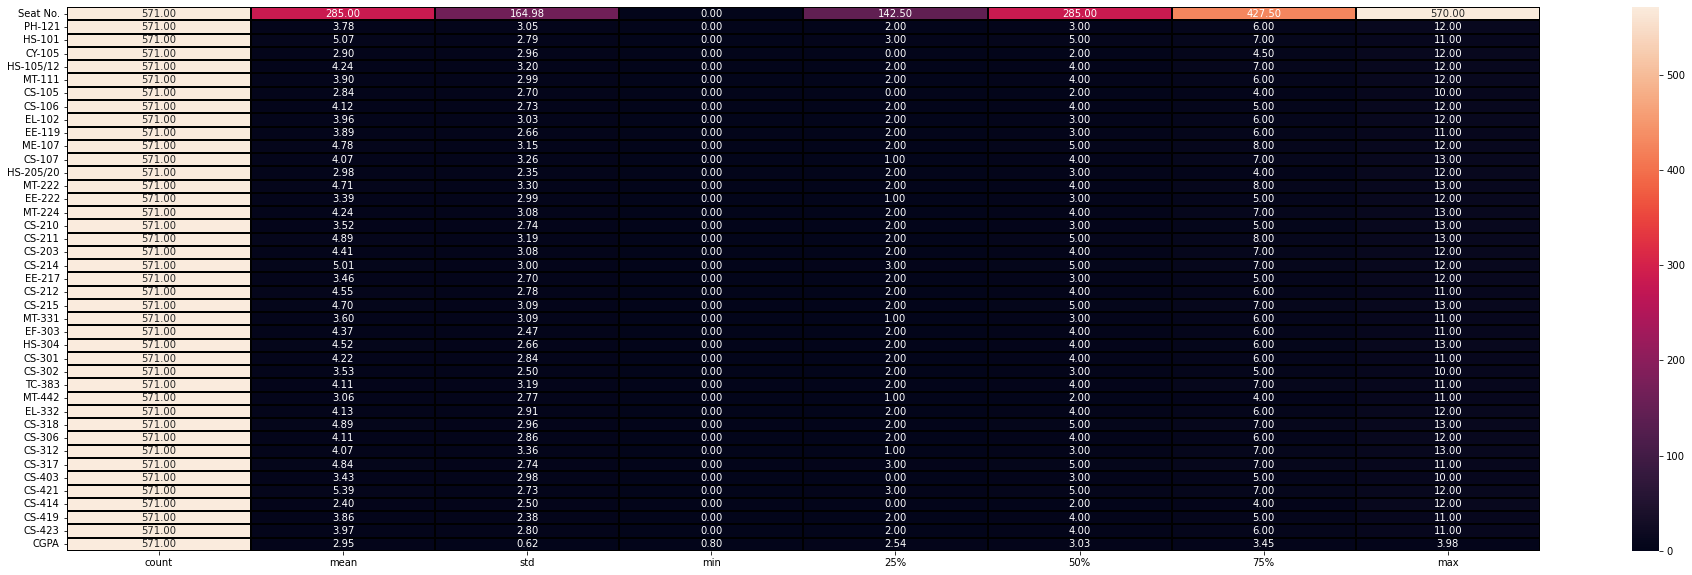

In [248]:
import matplotlib.pyplot as plt
plt.figure(figsize=(33,10))
sns.heatmap(df.describe().T,annot=True,linewidth=0.1,linecolor="black",fmt='0.2f')

In [249]:
#Correlation with the target column:
df.corr()['CGPA'].sort_values()

CS-210      -0.761468
CS-317      -0.760792
CS-214      -0.733848
CS-215      -0.730460
MT-111      -0.730095
EL-332      -0.729609
CS-306      -0.708299
CS-302      -0.696112
MT-224      -0.692696
CS-301      -0.664117
PH-121      -0.663135
ME-107      -0.663023
CY-105      -0.658282
MT-222      -0.656320
EE-217      -0.655993
EE-119      -0.646829
CS-203      -0.644191
CS-212      -0.642878
EL-102      -0.642262
CS-419      -0.641804
CS-421      -0.633001
CS-211      -0.628070
CS-107      -0.615309
HS-105/12   -0.613989
CS-105      -0.613169
MT-442      -0.582592
EE-222      -0.575335
TC-383      -0.572329
CS-318      -0.566393
HS-304      -0.557912
CS-403      -0.544543
HS-101      -0.537170
CS-106      -0.534995
CS-423      -0.520968
MT-331      -0.508428
EF-303      -0.485478
HS-205/20   -0.460525
CS-312      -0.458019
CS-414      -0.384003
Seat No.     0.054342
CGPA         1.000000
Name: CGPA, dtype: float64

From the above result , we can see that the correlation values are within the acceptable range, with highest value of CS-210 : -0.761468

<AxesSubplot:>

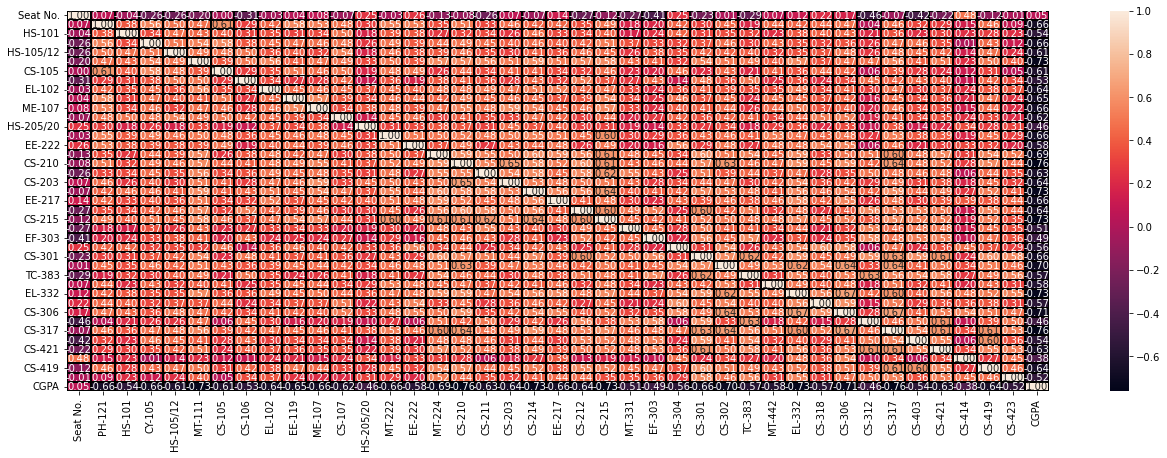

In [251]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

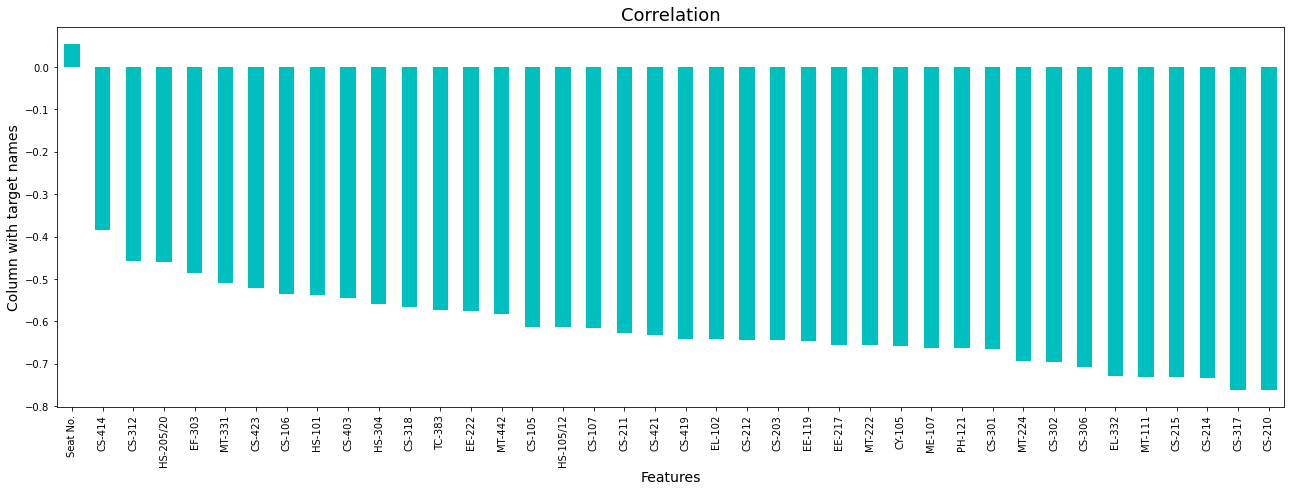

In [254]:
#checking the columns which are positively and negatively correlated with target 
plt.figure(figsize=(22,7))
df.corr()['CGPA'].sort_values(ascending=False).drop(['CGPA']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From the above plot , we can see that all are negatively correlated with target variable

In [255]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CGPA        -0.497203
dtype: float64

Also , the skewness for some columns is within the acceptable range of -0.5 to +0.5, 
Since the data is categorical in nature , we do not apply any transformations [since the data is independent]

In [256]:
#check outliers
df.dtypes

Seat No.     float64
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-414       float64
CS-419       float64
CS-423       float64
CGPA         float64
dtype: object

In [257]:
#Outliers removal
df.shape

(571, 41)

In [258]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 60,  60,  60,  91, 137, 143, 143, 281, 281, 281, 288, 288, 340,
        340, 352, 352, 382, 387, 410, 423, 424, 447, 454, 454, 550, 557,
        560, 563, 565], dtype=int64),
 array([ 3, 12, 20, 16,  3,  3, 40, 12, 16, 40, 12, 40, 25, 37, 25, 37, 37,
        37, 37, 37, 37, 37, 37, 38, 37, 37, 37, 38, 40], dtype=int64))

In [259]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,6.0,8.0,8.0,8.0,8.0,0.0,8.0,3.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,2.0,9.0,10.0,9.0,6.0,9.0,5.0,6.0,6.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,2.0,2.0,3.0,3.0,0.0,6.0,0.0,0.0,2.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,4.0,8.0,10.0,6.0,10.0,8.0,3.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,2.0,5.0,4.0,4.0,5.0,0.0,2.0,2.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,0.0,4.0,2.0,2.0,0.0,0.0,4.0,4.0,3.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,2.0,4.0,4.0,0.0,0.0,3.0,2.0,6.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,2.0,3.0,0.0,4.0,6.0,4.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,5.0,4.0,9.0,3.0,3.0,8.0,6.0,3.0,5.0,2.193


In [260]:
df_new_z.shape

(551, 41)

In [261]:
#Percentage of dataloss
data_loss=((571-551)/571)*100

In [262]:
data_loss

3.502626970227671

In [264]:
features=df.drop('CGPA',axis=1)
target=df['CGPA']

In [265]:
#separating the columns into feature and target:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [268]:
for i in range(0,100):
    feature_train,feature_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(feature_train,target_train)
    pred_train=lr.predict(feature_train)
    pred_test=lr.predict(feature_test)
    print(f"At random state{i}, the training accuracy is:{r2_score(target_train,pred_train)}")
    print(f"At random state{i}, the testing accuracy is:{r2_score(target_test,pred_test)}")
    print('\n')

At random state0, the training accuracy is:0.9234984327127389
At random state0, the testing accuracy is:0.9506256695813097


At random state1, the training accuracy is:0.9235507762364876
At random state1, the testing accuracy is:0.9498644167647462


At random state2, the training accuracy is:0.92517947309397
At random state2, the testing accuracy is:0.9433199901752941


At random state3, the training accuracy is:0.9231638313507581
At random state3, the testing accuracy is:0.943842226645168


At random state4, the training accuracy is:0.9244048164502204
At random state4, the testing accuracy is:0.940854110723615


At random state5, the training accuracy is:0.9272140029185691
At random state5, the testing accuracy is:0.9236758506152841


At random state6, the training accuracy is:0.9234286057003694
At random state6, the testing accuracy is:0.9553005284218649


At random state7, the training accuracy is:0.9238499707864066
At random state7, the testing accuracy is:0.9584370026701656


At r

In [271]:
 feature_train,feature_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=7)

In [272]:
lr.fit(feature_train,target_train)
pred_test=lr.predict(feature_test)
print(r2_score(target_test,pred_test))

0.9584370026701656
